<b> Outlier Tespiti </b>

In [18]:
import seaborn as sns
df = sns.load_dataset("diamonds") #seaborn kütüphanesinden diamonds veri seti
df = df.select_dtypes("float64","int64") #sadece sayısal verileri çekmek için filtreleme
df = df.dropna() #null değer temizliği

In [19]:
df_table = df["table"]

<Axes: xlabel='table'>

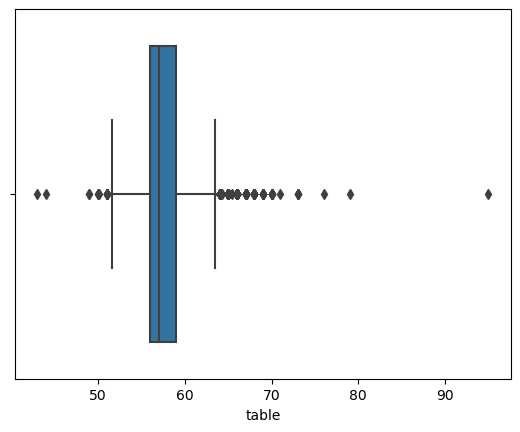

In [4]:
sns.boxplot(x = df_table) #boxplot grafiğinde sutunun sağ ve sol çizgisi dışında kalan değerler outlierdır.

<b> bir aykırı değere, outlier muamelesi yapmak için öncelikle eşik değer belirlemek gerekiyor. </b>

In [6]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1

In [7]:
IQR

3.0

In [9]:
alt_sinir = Q1 - IQR*1.5
alt_sinir

51.5

In [10]:
ust_sinir = Q3 + IQR*1.5
ust_sinir

63.5

In [11]:
(df_table < alt_sinir) | (df_table > ust_sinir) #True dönen indexler outlier.

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [12]:
aykiri_alt = (df_table < alt_sinir)

In [13]:
df_table[aykiri_alt] #alt sınırda kalan değerlere bu şekilde ulaşılıyor.

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

### Outlier Silme

In [14]:
import pandas as pd

In [15]:
df_table = pd.DataFrame(df_table)

In [16]:
data=df_table[~((df_table < (alt_sinir)) | (df_table > (ust_sinir))).any(axis=1)] #tilda işareti belirtilen değerlerin dışındaki sonuçları almaya yarar.

In [17]:
data.shape #yaklaşık 600 adet outlier gözlem veri setinden silindi.

(53335, 1)

### Ortalama ile Doldurma

In [ ]:
#aykırı değerleri silmek yerine ortalama değere çekmek için veri setini baştan import etmek gerek.

In [20]:
import seaborn as sns
df = sns.load_dataset("diamonds") #seaborn kütüphanesinden diamonds veri seti
df = df.select_dtypes("float64","int64") #sadece sayısal verileri çekmek için filtreleme
df = df.dropna() #null değer temizliği

In [23]:
df_table = df["table"] #table column'ı için outlier değerlere bakılacak.

In [27]:
df_table[aykiri_alt]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64